# LaserTrade – Predikce BTC
Tento notebook predikuje cenu BTC pomocí RSI, EMA a ML modelu.

In [35]:
import pandas as pd
# df = pd.read_csv('data/btc.csv')
# df.head()

# from src.data_loader import load_data

# df = load_data()
# df.head()

import sys
import os

# cesta k src relativně vůči notebooku
sys.path.append(os.path.abspath("../src"))

from data_loader import load_data

df = load_data()
df.head()

c:\Users\marti\LaserTrade\src\data_loader.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', period='2y', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2023-09-13,26228.324219,26376.113281,25781.123047,25837.554688,13072077070
1,2023-09-14,26539.673828,26774.623047,26171.451172,26228.277344,13811359124
2,2023-09-15,26608.693359,26840.498047,26240.701172,26533.818359,11479735788
3,2023-09-16,26568.281250,26754.769531,26473.890625,26606.199219,7402031417
4,2023-09-17,26534.187500,26617.998047,26445.074219,26567.927734,6774210670


In [36]:
# Přidání indikátorů

# import pandas as pd

# # def compute_rsi(series, period=14):
# #     delta = series.diff()
# #     gain = delta.clip(lower=0)
# #     loss = -delta.clip(upper=0)

# #     avg_gain = gain.rolling(window=period, min_periods=period).mean()
# #     avg_loss = loss.rolling(window=period, min_periods=period).mean()

# #     rs = avg_gain / avg_loss
# #     rsi = 100 - (100 / (1 + rs))
# #     return rsi

# # df['EMA_20'] = df['Close'].ewm(span=20, min_periods=1).mean()
# # df['RSI'] = compute_rsi(df['Close'])
# # df.tail()

# import sys
# import os

# # cesta k src relativně vůči notebooku
# sys.path.append(os.path.abspath("../src"))

# from indicators import add_indicators
# df = add_indicators(df)
# df.head()

from indicators import add_indicators

df = add_indicators(df)  # ← teď už df existuje
df.head()

Price,Date,Close,High,Low,Open,Volume,EMA_20,RSI
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
0,2023-09-13,26228.324219,26376.113281,25781.123047,25837.554688,13072077070,26228.324219,NaN
1,2023-09-14,26539.673828,26774.623047,26171.451172,26228.277344,13811359124,26391.782764,NaN
2,2023-09-15,26608.693359,26840.498047,26240.701172,26533.818359,11479735788,26471.431034,NaN
3,2023-09-16,26568.281250,26754.769531,26473.890625,26606.199219,7402031417,26499.390194,NaN
4,2023-09-17,26534.187500,26617.998047,26445.074219,26567.927734,6774210670,26507.807366,NaN


In [37]:
# Predikce
from model import train_model

df, model, acc = train_model(df)
print("Model accuracy:", acc)
df.tail()


Model accuracy: 0.5


c:\Users\marti\LaserTrade\src\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[X_test.index, 'Prediction'] = y_pred


Price,Date,Close,High,Low,Open,Volume,EMA_20,RSI,Target,Prediction
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
727,2025-09-09,111530.546875,113225.437500,110776.703125,112077.578125,45984480722,111827.915062,49.053765,1,0.0
728,2025-09-10,113955.359375,114275.250000,110940.078125,111531.250000,56377473784,112030.528806,58.424271,1,0.0
729,2025-09-11,115507.539062,115522.546875,113453.835938,113961.429688,45685065332,112361.672640,59.004074,1,0.0
730,2025-09-12,116101.578125,116769.382812,114794.484375,115507.789062,54785725894,112717.854115,79.780780,0,0.0
731,2025-09-13,115702.148438,116310.382812,115267.875000,116104.312500,41638035456,113002.072622,76.691328,0,0.0


In [38]:
# Predikce zítřka

# Poslední řádek dat
last_row = df.iloc[[-1]]

# Funkce modelu potřebuje tyto sloupce
features = ['Close', 'EMA_20', 'RSI', 'Volume']
X_last = last_row[features]

# Predikce
pred = model.predict(X_last)[0]

# Výpis
if pred == 1:
    print("Predikce pro zítra: TRH PŮJDE NAHORU ↑")
else:
    print("Predikce pro zítra: TRH PŮJDE DOLŮ ↓")


Predikce pro zítra: TRH PŮJDE DOLŮ ↓


Text(2025-09-13 00:00:00, Ticker
BTC-USD    69421.289062
Name: 731, dtype: float64, 'TRH PŮJDE DOLŮ ↓')

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


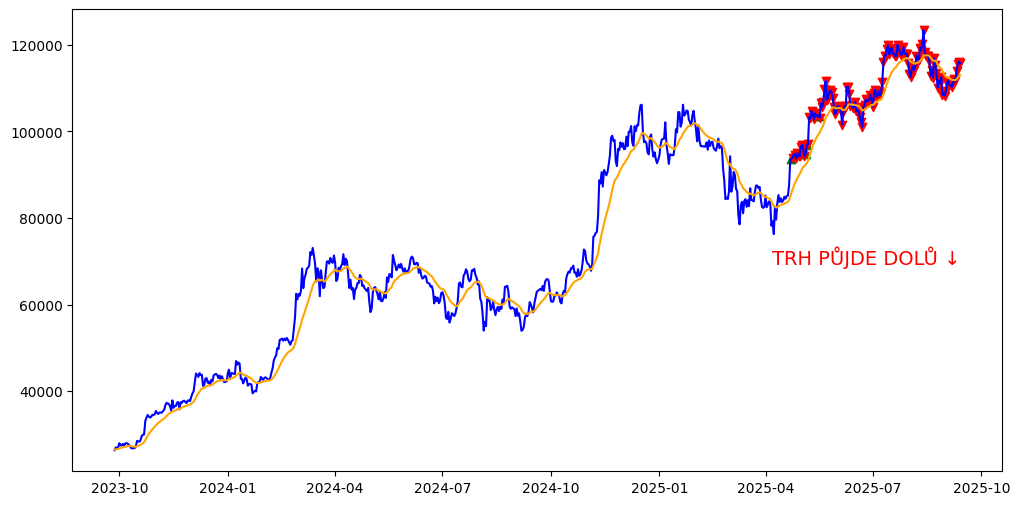

In [39]:
# Vizualizace
# import matplotlib.pyplot as plt
# plt.plot(df['Close'], label='Cena BTC')
# plt.plot(df['EMA_20'], label='EMA 20')
# plt.legend()
# plt.show()

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
# plt.plot(df['Date'], df['Close'], label='Close')
# plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
# plt.title('BTC Close Price + EMA 20')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()



# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
# plt.plot(df['Date'], df['Close'], label='Close')
# plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
# plt.legend()
# plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Close a EMA
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='orange')

# Predikce růstu (1) – zelené šipky nahoru
plt.scatter(df['Date'][df['Prediction']==1], 
            df['Close'][df['Prediction']==1],
            label='Predicted Up', color='green', marker='^')

# Predikce poklesu (0) – červené šipky dolů
plt.scatter(df['Date'][df['Prediction']==0], 
            df['Close'][df['Prediction']==0],
            label='Predicted Down', color='red', marker='v')

# Predikce – jen poslední řádek
last_row = df.iloc[[-1]]
features = ['Close', 'EMA_20', 'RSI', 'Volume']
X_last = last_row[features]
pred = model.predict(X_last)[0]

# Přidání textu pod graf
prediction_text = "TRH PŮJDE NAHORU ↑" if pred==1 else "TRH PŮJDE DOLŮ ↓"
plt.text(df['Date'].iloc[-1], df['Close'].iloc[-1]*0.60, prediction_text,
         fontsize=14, color='red', ha='right')



# plt.title('BTC Close + EMA + Predikce růstu a poklesu')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()


# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))

# # Close a EMA
# plt.plot(df['Date'], df['Close'], label='Close', color='blue')
# plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='orange')

# # Predikce – jen poslední řádek
# last_row = df.iloc[[-1]]
# features = ['Close', 'EMA_20', 'RSI', 'Volume']
# X_last = last_row[features]
# pred = model.predict(X_last)[0]

# # Přidání textu pod graf
# prediction_text = "TRH PŮJDE NAHORU ↑" if pred==1 else "TRH PŮJDE DOLŮ ↓"
# plt.text(df['Date'].iloc[-1], df['Close'].iloc[-1]*0.98, prediction_text,
#          fontsize=14, color='red', ha='right')

# plt.title('BTC Close + EMA + Predikce pro zítřek')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

